In [10]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from pydantic import BaseModel

In [4]:
class State(BaseModel):
    name: str

In [14]:
def example_node(state: State):
    return {"name": "Hello, "+ state.name}

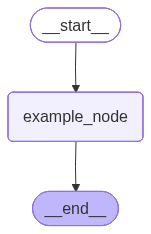

In [15]:
graph_builder = StateGraph(State)

graph_builder.add_node("example_node", example_node)

graph_builder.add_edge(START, "example_node")
graph_builder.add_edge("example_node", END)


graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({"name": "Naina"})

{'name': 'Hello, Naina'}

In [18]:
graph.invoke({"name": 123})

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type